In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas-profiling
from ydata_profiling import ProfileReport

Defaulting to user installation because normal site-packages is not writeable


In [3]:
Cab_Data = pd.read_csv('Cab_Data.csv')

In [56]:
Cab_Data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [48]:
Cab_Data.isna()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
359387,False,False,False,False,False,False,False
359388,False,False,False,False,False,False,False
359389,False,False,False,False,False,False,False
359390,False,False,False,False,False,False,False


In [49]:
Cab_Data.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [22]:
Company = pd.pivot_table(Cab_Data,index = 'Company', values='Transaction ID', aggfunc='count')
Company

,Transaction ID
Company,
Pink Cab,84711
Yellow Cab,274681


<AxesSubplot:xlabel='Company'>

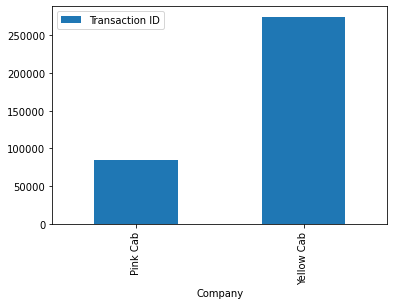

In [23]:
Company.plot(kind='bar')

# 1. Profit Analysis: City Base

In [5]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
Cab_company = Cab_Data.groupby('Company')

In [5]:
pink_cab = Cab_company.get_group('Pink Cab')
yellow_cab = Cab_company.get_group('Yellow Cab')

In [54]:
yellow_cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
233,10000384,42371,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624
234,10000385,42378,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832
235,10000386,42372,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880
236,10000387,42375,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400
237,10000388,42376,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [6]:
#Pink Average profit per km
Pink_Average_profit_km = (pink_cab['Price Charged'].sum()-pink_cab['Cost of Trip'].sum())/pink_cab['KM Travelled'].sum()

In [7]:
Pink_Average_profit_km

2.777145622126409

In [8]:
#Yellow Average profit per km
Yellow_Average_profit_km = (yellow_cab['Price Charged'].sum()-yellow_cab['Cost of Trip'].sum())/yellow_cab['KM Travelled'].sum()

In [9]:
Yellow_Average_profit_km

7.1007273479841935

# 2. Profit Analysis: %

In [10]:
#Pink profit %
Pink_Average_profit_percent = (pink_cab['Price Charged'].sum()-pink_cab['Cost of Trip'].sum())/pink_cab['Price Charged'].sum()

In [11]:
Pink_Average_profit_percent

0.20158301645170454

In [12]:
Yellow_Average_profit_percent = (yellow_cab['Price Charged'].sum()-yellow_cab['Cost of Trip'].sum())/yellow_cab['Price Charged'].sum()

In [13]:
Yellow_Average_profit_percent

0.3497736474706021

In [14]:
#Pink Cab profit table
pink_cab_profit_total = pink_cab['Price Charged'].sum()-pink_cab['Cost of Trip'].sum()
pink_cab_profitperride = pink_cab_profit_total/84711
print(pink_cab_profit_total)
print(pink_cab_profitperride)

5307328.321000002
62.65217410961979


In [15]:
#Yellow Cab profit table
yellow_cab_profit_total = yellow_cab['Price Charged'].sum()-yellow_cab['Cost of Trip'].sum()
yellow_cab_profitperride = yellow_cab_profit_total/274681
print(yellow_cab_profit_total)
print(yellow_cab_profitperride)

44020373.17079997
160.25998584103004


# 3. Profit and customer base

In [15]:
Cab_Data['Date of Travel'].value_counts()

43105    2022
43084    1123
43077    1100
43449    1086
43063    1085
         ... 
42388      88
42381      86
42380      85
42374      47
42373      25
Name: Date of Travel, Length: 1095, dtype: int64

In [38]:
Cab_Data['Date of Travel'].sort_values(ascending = True)

1030      42371
489       42371
484       42371
850       42371
160       42371
          ...  
355489    43465
354114    43465
356365    43465
359162    43465
358336    43465
Name: Date of Travel, Length: 359392, dtype: int64

In [16]:
pd.read_csv('City.csv')

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [17]:
pd.read_csv('Transaction_ID.csv')

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [18]:
pd.read_csv('Customer_ID.csv')

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [73]:
Customer_ID = pd.read_csv('Customer_ID.csv')
Transaction_ID = pd.read_csv('Transaction_ID.csv')
City = pd.read_csv('City.csv')

In [21]:
#merge Customer_ID.csv & Transaction_ID.csv
merge_CustomerID = Customer_ID.merge(Transaction_ID,on=['Customer ID'])

In [22]:
#delete the repeat row of CustomerID
merge_CustomerID_norepeat = merge_CustomerID.drop_duplicates(subset=['Customer ID'], keep='first')

In [23]:
#merge merge_CustomerID and Cab_Data.csv
merge_CustomerID2 = Cab_Data.merge(merge_CustomerID,on=['Transaction ID'])

In [24]:
#drop duplicates
merge_CustomerID2_norepeat = merge_CustomerID2.drop_duplicates(subset=['Customer ID'], keep='first')

In [83]:
merge_CustomerID2_norepeat

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...
359114,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Female,42,19417,Card
359123,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Male,33,18713,Cash
359155,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Male,38,3960,Card
359157,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Male,23,19454,Cash


In [25]:
Customer_base = merge_CustomerID2_norepeat.groupby(['Company'])
Customer_base_pinkcab = Customer_base.get_group('Pink Cab')
Customer_base_yellowcab = Customer_base.get_group('Yellow Cab')

In [26]:
#pinkcab gender split
Customer_base_pinkcab_gender = Customer_base_pinkcab.groupby(['Gender'])
Customer_base_pinkcab_male = Customer_base_pinkcab_gender.get_group('Male')
Customer_base_pinkcab_female = Customer_base_pinkcab_gender.get_group('Female')

In [95]:
#pink cab male
Customer_base_pinkcab_male.count()

Transaction ID        7819
Date of Travel        7819
Company               7819
City                  7819
KM Travelled          7819
Price Charged         7819
Cost of Trip          7819
Customer ID           7819
Gender                7819
Age                   7819
Income (USD/Month)    7819
Payment_Mode          7819
dtype: int64

In [97]:
#pink cab female
Customer_base_pinkcab_female.count()

Transaction ID        7010
Date of Travel        7010
Company               7010
City                  7010
KM Travelled          7010
Price Charged         7010
Cost of Trip          7010
Customer ID           7010
Gender                7010
Age                   7010
Income (USD/Month)    7010
Payment_Mode          7010
dtype: int64

In [27]:
#yellowcab gender split
Customer_base_yellowcab_gender = Customer_base_yellowcab.groupby(['Gender'])
Customer_base_yellowcab_male = Customer_base_yellowcab_gender.get_group('Male')
Customer_base_yellowcab_female = Customer_base_yellowcab_gender.get_group('Female')

In [28]:
#yellow cab male
Customer_base_yellowcab_male.count()

Transaction ID        16856
Date of Travel        16856
Company               16856
City                  16856
KM Travelled          16856
Price Charged         16856
Cost of Trip          16856
Customer ID           16856
Gender                16856
Age                   16856
Income (USD/Month)    16856
Payment_Mode          16856
dtype: int64

In [29]:
#yellow cab female
Customer_base_yellowcab_female.count()

Transaction ID        14463
Date of Travel        14463
Company               14463
City                  14463
KM Travelled          14463
Price Charged         14463
Cost of Trip          14463
Customer ID           14463
Gender                14463
Age                   14463
Income (USD/Month)    14463
Payment_Mode          14463
dtype: int64

# 4. Income Class wise Profit and customer base analysis

In [54]:
#split pinkcab and yellowcab into 3 group based on income/monthly
Customer_base1 = merge_CustomerID2.groupby(['Company'])
Customer_base_pinkcab1 = Customer_base1.get_group('Pink Cab')
Customer_base_yellowcab1 = Customer_base1.get_group('Yellow Cab')

#pinkcab class seperate
pinkcab_lowerclass = Customer_base_pinkcab1[Customer_base_pinkcab1['Income (USD/Month)']<=2500]
pinkcab_middleclass = Customer_base_pinkcab1[((Customer_base_pinkcab1['Income (USD/Month)']>2500) & (Customer_base_pinkcab1['Income (USD/Month)']<=15000))]
pinkcab_upperclass = Customer_base_pinkcab1[Customer_base_pinkcab1['Income (USD/Month)']>15000]
#yellowcab class seperate
yellowcab_lowerclass = Customer_base_yellowcab1[Customer_base_yellowcab1['Income (USD/Month)']<=2500]
yellowcab_middleclass = Customer_base_yellowcab1[((Customer_base_yellowcab1['Income (USD/Month)']>2500) & (Customer_base_yellowcab1['Income (USD/Month)']<=15000))]
yellowcab_upperclass = Customer_base_yellowcab1[Customer_base_yellowcab1['Income (USD/Month)']>15000]

In [61]:
#get the profit of each class
pinkcab_lowerclass_profit = (pinkcab_lowerclass['Price Charged'].sum()-pinkcab_lowerclass['Cost of Trip'].sum())
pinkcab_middleclass_profit = (pinkcab_middleclass['Price Charged'].sum()-pinkcab_middleclass['Cost of Trip'].sum())
pinkcab_upperclass_profit = (pinkcab_upperclass['Price Charged'].sum()-pinkcab_upperclass['Cost of Trip'].sum())

yellowcab_lowerclass_profit = (yellowcab_lowerclass['Price Charged'].sum()-yellowcab_lowerclass['Cost of Trip'].sum())
yellowcab_middleclass_profit = (yellowcab_middleclass['Price Charged'].sum()-yellowcab_middleclass['Cost of Trip'].sum())
yellowcab_upperclass_profit = (yellowcab_upperclass['Price Charged'].sum()-yellowcab_upperclass['Cost of Trip'].sum())

In [63]:
#result
print(pinkcab_lowerclass_profit)
print(pinkcab_middleclass_profit)
print(pinkcab_upperclass_profit)

print(yellowcab_lowerclass_profit)
print(yellowcab_middleclass_profit)
print(yellowcab_upperclass_profit)

107193.44400000002
2579772.414000001
2620362.4629999995
842536.0688000005
21416850.877600007
21760986.224400006


# 5. Age Groupwise Profit and Customer Base Analysis

In [66]:
#pinkcab age seperation
pinkcab_18_25 = Customer_base_pinkcab1[Customer_base_pinkcab1['Age']<=25]
pinkcab_26_40 = Customer_base_pinkcab1[((Customer_base_pinkcab1['Age']>25)&(Customer_base_pinkcab1['Age']<=40))]
pinkcab_41_60 = Customer_base_pinkcab1[((Customer_base_pinkcab1['Age']>40)&(Customer_base_pinkcab1['Age']<=60))]
pinkcab_60 = Customer_base_pinkcab1[Customer_base_pinkcab1['Age']>60]

#yellowcab age seperation
yellowcab_18_25 = Customer_base_yellowcab1[Customer_base_yellowcab1['Age']<=25]
yellowcab_26_40 = Customer_base_yellowcab1[((Customer_base_yellowcab1['Age']>25)&(Customer_base_yellowcab1['Age']<=40))]
yellowcab_41_60 = Customer_base_yellowcab1[((Customer_base_yellowcab1['Age']>40)&(Customer_base_yellowcab1['Age']<=60))]
yellowcab_60 = Customer_base_yellowcab1[Customer_base_yellowcab1['Age']>60]

In [70]:
#get profit of each year group
pinkcab_18_25_profit = (pinkcab_18_25['Price Charged'].sum()-pinkcab_18_25['Cost of Trip'].sum())
pinkcab_26_40_profit = (pinkcab_26_40['Price Charged'].sum()-pinkcab_26_40['Cost of Trip'].sum())
pinkcab_41_60_profit = (pinkcab_41_60['Price Charged'].sum()-pinkcab_41_60['Cost of Trip'].sum())
pinkcab_60_profit = (pinkcab_60['Price Charged'].sum()-pinkcab_60['Cost of Trip'].sum())

yellowcab_18_25_profit = (yellowcab_18_25['Price Charged'].sum()-yellowcab_18_25['Cost of Trip'].sum())
yellowcab_26_40_profit = (yellowcab_26_40['Price Charged'].sum()-yellowcab_26_40['Cost of Trip'].sum())
yellowcab_41_60_profit = (yellowcab_41_60['Price Charged'].sum()-yellowcab_41_60['Cost of Trip'].sum())
yellowcab_60_profit = (yellowcab_60['Price Charged'].sum()-yellowcab_60['Cost of Trip'].sum())

In [71]:
print(pinkcab_18_25_profit)
print(pinkcab_26_40_profit)
print(pinkcab_41_60_profit)
print(pinkcab_60_profit)

print(yellowcab_18_25_profit)
print(yellowcab_26_40_profit)
print(yellowcab_41_60_profit)
print(yellowcab_60_profit)

1404670.8680000007
2500926.296000002
1121136.5439999998
280594.6129999999
11444776.060399998
20776985.20840001
9605668.439599998
2192943.4624000005


# 6. City Wise Cab Users Covered

In [72]:
merge_CustomerID2

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,24,15651,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card


In [74]:
#5 ride
City

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [78]:
Customer_citywise = merge_CustomerID2.groupby(['City'])

Customer_NewYorkNY = Customer_citywise.get_group('NEW YORK NY')
Customer_ChicagoIL = Customer_citywise.get_group('CHICAGO IL')
Customer_LosAngelesCA = Customer_citywise.get_group('LOS ANGELES CA')
Customer_MiamiFL = Customer_citywise.get_group('MIAMI FL')
Customer_SiliconValley = Customer_citywise.get_group('SILICON VALLEY')
Customer_OrangeCounty = Customer_citywise.get_group('ORANGE COUNTY')
Customer_SanDiegoCA = Customer_citywise.get_group('SAN DIEGO CA')
Customer_PhoenixAZ = Customer_citywise.get_group('PHOENIX AZ')
Customer_DallasTX = Customer_citywise.get_group('DALLAS TX')
Customer_AtlantaGA = Customer_citywise.get_group('ATLANTA GA')
Customer_DenverCO = Customer_citywise.get_group('DENVER CO')
Customer_AustinTX = Customer_citywise.get_group('AUSTIN TX')
Customer_SeattleWA = Customer_citywise.get_group('SEATTLE WA')
Customer_TucsonAZ = Customer_citywise.get_group('TUCSON AZ')
Customer_SacramentoCA = Customer_citywise.get_group('SACRAMENTO CA')
Customer_PittsburghPA = Customer_citywise.get_group('PITTSBURGH PA')
Customer_WashingtonDC = Customer_citywise.get_group('WASHINGTON DC')
Customer_NashvilleTN = Customer_citywise.get_group('NASHVILLE TN')
Customer_BostonMA = Customer_citywise.get_group('BOSTON MA')